In [1]:
import re
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv( "data/input/dataset-forbes.csv", sep=";")

In [3]:
df.head( 5)

,id,date,title,description
0,content_65ea8c1b47cdeb397afff41d,2024-03-08T14:00:00.000Z,What’s Next For Southwest Stock After A 20% Ri...,Southwest Airlines (NYSE: LUV) reported its Q4...
1,content_65eb16c0c936f94fa93ca497,2024-03-08T13:57:54.752Z,Another Strong Jobs Number But A Smaller Numbe...,"Heading into the jobs report, estimates called..."
2,content_65ea08200a4f4e6caa2a0134,2024-03-08T13:25:15.999Z,One Size Does NOT Fit All - Talking To Women A...,Women have known for years – one size does not...
3,content_65ea8b9b1a35df3d1707f536,2024-03-08T13:00:00.000Z,Should You Pick CVS Stock At $75 After A 6% Fa...,CVS Health (NYSE: CVS) reported its Q4 results...
4,content_65ea32f9b5bb6600487a9824,2024-03-08T13:00:00.000Z,Communicating Effectively In The Competitive P...,If you want to capture mindshare in the compet...


In [4]:
df.describe()

,id,date,title,description
count,48476,48476,48476,48426
unique,48414,45601,47903,47694
top,content_5ffbf9ccf714270006dc6f11,2021-05-13T10:00:00.000Z,Closed Alert,What took place this week in the credit card a...
freq,2,18,18,163


In [5]:
df[ df.isnull().any( axis=1)]

,id,date,title,description
2378,content_65660072bc8531d6a3d1f315,2023-11-28T14:59:17.257Z,Bad Bunny On His Music Career Inspiring Him To...,NaN
2379,content_6565fe1fbc8531d6a3796d55,2023-11-28T14:43:03.630Z,Bad Bunny | Exclusive Full Forbes Interview,NaN
3858,content_651c51f36411c686bce07cf8,2023-10-03T17:33:31.012Z,Sam Bankman-Fried's Feud Trial Begins Today. H...,NaN
4432,content_6500a13d0f30efe65ed984e2,2023-09-12T17:34:53.000Z,In Pictures: The 25 Best Places To Enjoy Your ...,NaN
5564,content_64c856bb2c878a5a89416dd8,2023-08-01T00:41:02.025Z,patti-export-loop-clipcut-final-2,NaN
6081,content_64af1902b3c86557b6778b9f,2023-07-12T21:14:40.216Z,Patti Brennan | Forbes/SHOOK Top Advisor,NaN
9147,content_641dee869c2604d21db77a25,2023-03-24T18:37:04.118Z,Royce Zimmerman | Forbes/SHOOK Top Advisor,NaN
10500,content_63e50a73a479318b670c7edf,2023-02-09T14:53:17.253Z,KBW's Matt Kelley Breaks Down Financial All-Stars,NaN
12382,content_639777da9a13a5c572602982,2022-12-12T18:46:48.038Z,Sam Bankman-Fried Full Interview With Steven E...,NaN
14574,content_634302c4d94d26562b1931aa,2022-10-09T17:10:05.718Z,Billionaire Mark Cuban On How Capitalism Can C...,NaN


In [6]:
df = df.fillna( "")

In [7]:
df[ "text"] = df[ "title"] + ", " + df[ "description"]

In [8]:
def create_words_frequency( features, feature_names):
	features_df = pd.DataFrame( features)
	features_df.columns = feature_names
	sorted_features = features_df.sum( axis=0).sort_values( ascending=False)
	sorted_features = sorted_features.reset_index()
	sorted_features.columns = [ "Top Words", "Counts"]
	return sorted_features

In [9]:
def create_tfidf( df, feature_column, max_feature_size):
	tfidf_vec = TfidfVectorizer(
		preprocessor=lambda x: re.sub( r'(\d[\d\.])+', "", x.lower()),
		sublinear_tf=True,
		min_df=2,
		norm="l2",
		encoding="latin-1",
		ngram_range=( 1, 3),
		stop_words=list( text.ENGLISH_STOP_WORDS),
		max_features=max_feature_size
	)

	features = tfidf_vec.fit_transform( df[ feature_column]).toarray()

	return features, tfidf_vec

In [10]:
features_tfidf, tfidf_vec = create_tfidf( df, feature_column="text", max_feature_size=5000)

In [11]:
features_tfidf_names = tfidf_vec.get_feature_names_out()

features_tfidf_names

array(['1q', '1st', '2nd', ..., 'zone', 'zoom', 'zynga'], dtype=object)

In [12]:
tfidf_sorted_table = create_words_frequency( features_tfidf, features_tfidf_names)

tfidf_sorted_table.head( 20)

,Top Words,Counts
0,stock,1161.295621
1,market,726.599043
2,year,697.668744
3,stocks,677.124356
4,new,644.863154
5,tax,585.908083
6,investors,526.160556
7,financial,504.634286
8,week,489.092718
9,company,463.481505


In [13]:
def generate_word_cloud( word_frequency, title):
	word_freq_dict = {}
	for word, freq in zip( word_frequency[ "Top Words"], word_frequency[ "Counts"]):
		word_freq_dict[ word] = freq

	word_cloud = WordCloud(
		width=1920,
		height=1080,
		background_color="white"
	).generate_from_frequencies( word_freq_dict)

	plt.figure()
	plt.title( title)
	plt.imshow( word_cloud)
	plt.axis( "off")
	plt.tight_layout( pad=0)

	plt.show()

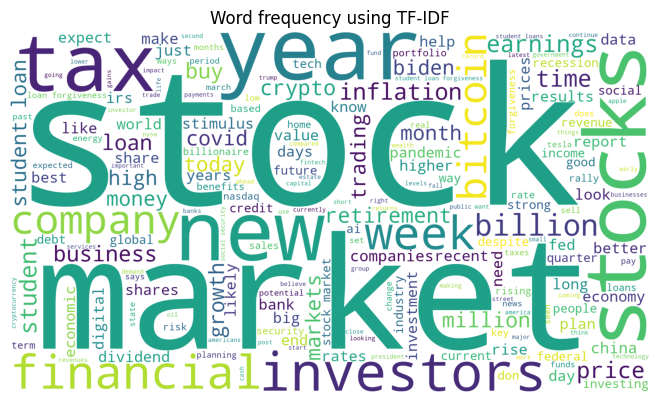

In [14]:
generate_word_cloud( tfidf_sorted_table, "Word frequency using TF-IDF")

In [15]:
def create_bow( df, feature_column, max_feature_size):
    counter_vec = CountVectorizer(
		preprocessor=lambda x: re.sub( r'(\d[\d\.])+', "", x.lower()),
        encoding="latin-1",
        ngram_range=( 1, 3),
        stop_words=list( text.ENGLISH_STOP_WORDS),
        max_features=max_feature_size
    )

    features = counter_vec.fit_transform( df[ feature_column]).toarray()

    return features, counter_vec

In [16]:
features_bow, bow_vec = create_bow( df, feature_column="text", max_feature_size=5000)

In [17]:
features_bow_names = bow_vec.get_feature_names_out()

features_bow_names

array(['1q', '1st', '2nd', ..., 'zone', 'zoom', 'zynga'], dtype=object)

In [18]:
bow_sorted_table = create_words_frequency( features_bow, features_bow_names)

bow_sorted_table.head( 20)

,Top Words,Counts
0,stock,16693
1,year,6644
2,market,6525
3,stocks,6021
4,new,5713
5,tax,5311
6,week,4287
7,company,4064
8,investors,4059
9,financial,3908


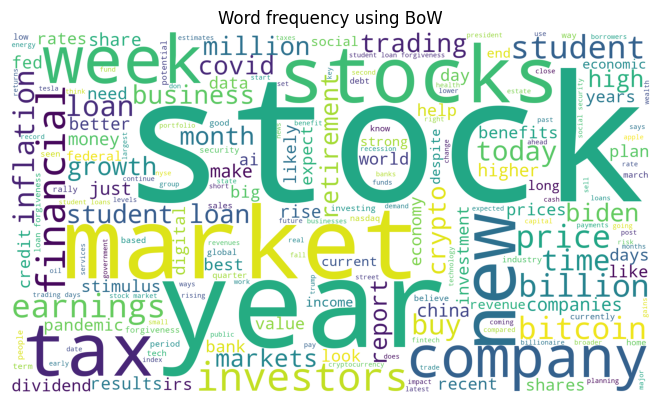

In [19]:
generate_word_cloud( bow_sorted_table, "Word frequency using BoW")

In [20]:
new_df = df[ [ "date", "text"]]

new_df.head( 5)

,date,text
0,2024-03-08T14:00:00.000Z,What’s Next For Southwest Stock After A 20% Ri...
1,2024-03-08T13:57:54.752Z,Another Strong Jobs Number But A Smaller Numbe...
2,2024-03-08T13:25:15.999Z,One Size Does NOT Fit All - Talking To Women A...
3,2024-03-08T13:00:00.000Z,Should You Pick CVS Stock At $75 After A 6% Fa...
4,2024-03-08T13:00:00.000Z,Communicating Effectively In The Competitive P...


In [22]:
new_df.to_csv( "data/result/clean-data.csv", sep=";", index=False)